# DATA EXPLORATION BABYYYYYYYY

## iMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Data

In [2]:
df = pd.read_csv("tracks.csv.zip", sep=",")

In [3]:
df.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
df.shape

(586672, 20)

# Variables of Interest

In [5]:
df = df[[
    "id", "name", "popularity", "duration_ms", "artists", "release_date", "danceability", "loudness", "tempo"
]]

### Missing Values Hunt

In [6]:
df.isna().sum()

id               0
name            71
popularity       0
duration_ms      0
artists          0
release_date     0
danceability     0
loudness         0
tempo            0
dtype: int64

#### Few so we delete this shit

In [8]:
df_no_na = df.dropna().reset_index().drop(columns="index")
df_no_na.isna().sum()

id              0
name            0
popularity      0
duration_ms     0
artists         0
release_date    0
danceability    0
loudness        0
tempo           0
dtype: int64

#### This shit be CLEAN AF MATE

## Analyzing our variables

In [9]:
df_no_na["popularity"].describe()

count    586601.000000
mean         27.573212
std          18.369417
min           0.000000
25%          13.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

#### Popularity ranges from 0 to 100

In [10]:
df_no_na["loudness"].describe()

count    586601.000000
mean        -10.205789
std           5.089422
min         -60.000000
25%         -12.891000
50%          -9.242000
75%          -6.481000
max           5.376000
Name: loudness, dtype: float64

#### Loudness ranges from -60 to 5.37 

In [11]:
df_no_na["duration_s"] = round(df_no_na["duration_ms"] / 1000)
df_no_na["duration_s"].describe()

count    586601.000000
mean        230.054333
std         126.532822
min           3.000000
25%         175.000000
50%         215.000000
75%         264.000000
max        5621.000000
Name: duration_s, dtype: float64

#### Duration in seconds (instead of miliseconds) ranges from 3 to 5621 seconds

In [12]:
df_no_na["danceability"].describe()

count    586601.000000
mean          0.563612
std           0.166101
min           0.000000
25%           0.453000
50%           0.577000
75%           0.686000
max           0.991000
Name: danceability, dtype: float64

#### Danceability ranges from 0 to 0.991

In [13]:
df_no_na["tempo"].describe()

count    586601.000000
mean        118.467930
std          29.762942
min           0.000000
25%          95.606000
50%         117.387000
75%         136.324000
max         246.381000
Name: tempo, dtype: float64

#### Tempo ranges from 0 to 246.381 

# Expectations

- We expect danceability to be strongly positively correlated with popularity
- The opposite probably goes for duration since today, most mainstream artists favor short hits
- Release date probably has an influence, since older songs seem to die out bit by bit (though some unforgettable classics forever remain in our hearts)
- Linking popularity to loudness and tempo is a bit more tricky. Their relationship is surely non-linear

#### To make it easier for us lazy cunts, allow us to convert popularity to a dummy variable with 1 meaning popularity is above 80 and 0 otherwise

In [14]:
fake_series = pd.Series(range(len(df_no_na)))

for i in range(len(df_no_na)):
    if df_no_na["popularity"][i] > 80:
        fake_series[i] = 1
    else:
        fake_series[i] = 0

In [15]:
df_no_na["dummy_pop"] = fake_series

# Study Song Profiles between Popular and Unpopular Music

In [16]:
df_pop = df_no_na[df_no_na["dummy_pop"] == 1].reset_index().drop(columns="index")
df_unpop = df_no_na[df_no_na["dummy_pop"] == 0].reset_index().drop(columns="index")

## Loudness

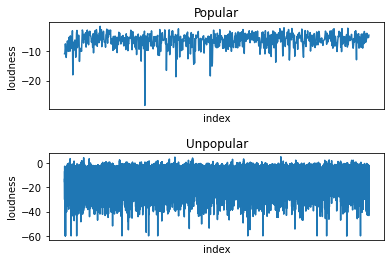

In [17]:
fig = plt.figure()

subplot1 = fig.add_subplot(2, 1, 1)
subplot1.plot(df_pop["loudness"])
#plt.ylim([-60, 5])
plt.xlabel("index")
plt.ylabel("loudness")
plt.title("Popular")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False  # labels along the bottom edge are off
)


subplot2=fig.add_subplot(2, 1, 2)
subplot2.plot(df_unpop["loudness"])
#plt.ylim([-60, 5])
plt.xlabel("index")
plt.ylabel("loudness")
plt.title("Unpopular")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False  # labels along the bottom edge are off
)


plt.subplots_adjust(
    hspace=0.5
)

Text(0.5, 1.0, 'Popularity as a Function of Loudness')

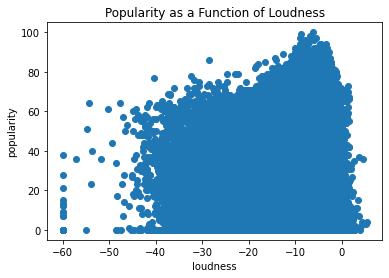

In [18]:
plt.scatter(
    x=df_no_na["loudness"],
    y=df_no_na["popularity"]
)

plt.xlabel("loudness")
plt.ylabel("popularity")
plt.title("Popularity as a Function of Loudness")

## Danceability

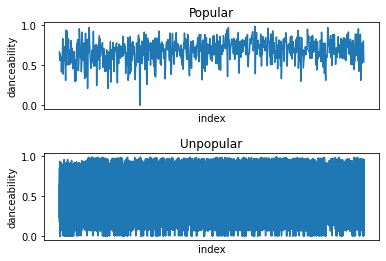

In [19]:
fig = plt.figure()

subplot1 = fig.add_subplot(2, 1, 1)
subplot1.plot(df_pop["danceability"])
#plt.ylim([-60, 5])
plt.xlabel("index")
plt.ylabel("danceability")
plt.title("Popular")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False  # labels along the bottom edge are off
)


subplot2=fig.add_subplot(2, 1, 2)
subplot2.plot(df_unpop["danceability"])
#plt.ylim([-60, 5])
plt.xlabel("index")
plt.ylabel("danceability")
plt.title("Unpopular")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False  # labels along the bottom edge are off
)


plt.subplots_adjust(
    hspace=0.5
)

Text(0.5, 1.0, 'Popularity as a Function of Danceability')

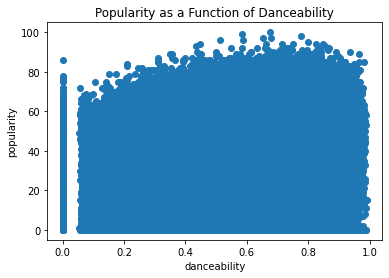

In [20]:
plt.scatter(
    x=df_no_na["danceability"],
    y=df_no_na["popularity"]
)

plt.xlabel("danceability")
plt.ylabel("popularity")
plt.title("Popularity as a Function of Danceability")

## Tempo 

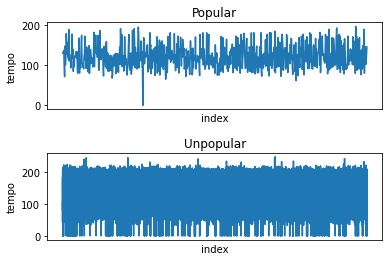

In [21]:
fig = plt.figure()

subplot1 = fig.add_subplot(2, 1, 1)
subplot1.plot(df_pop["tempo"])
#plt.ylim([-60, 5])
plt.xlabel("index")
plt.ylabel("tempo")
plt.title("Popular")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False  # labels along the bottom edge are off
)


subplot2=fig.add_subplot(2, 1, 2)
subplot2.plot(df_unpop["tempo"])
#plt.ylim([-60, 5])
plt.xlabel("index")
plt.ylabel("tempo")
plt.title("Unpopular")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False  # labels along the bottom edge are off
)


plt.subplots_adjust(
    hspace=0.5
)

Text(0.5, 1.0, 'Popularity as a Function of Tempo')

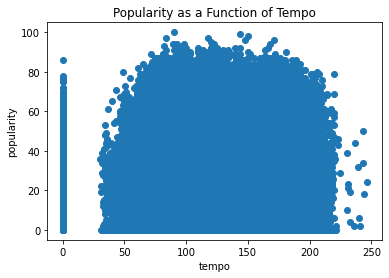

In [22]:
plt.scatter(
    x=df_no_na["tempo"],
    y=df_no_na["popularity"]
)

plt.xlabel("tempo")
plt.ylabel("popularity")
plt.title("Popularity as a Function of Tempo")

## Duration

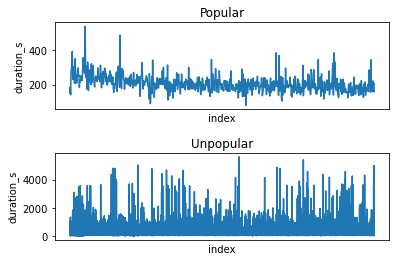

In [23]:
fig = plt.figure()

subplot1 = fig.add_subplot(2, 1, 1)
subplot1.plot(df_pop["duration_s"])
#plt.ylim([-60, 5])
plt.xlabel("index")
plt.ylabel("duration_s")
plt.title("Popular")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False  # labels along the bottom edge are off
)


subplot2=fig.add_subplot(2, 1, 2)
subplot2.plot(df_unpop["duration_s"])
#plt.ylim([-60, 5])
plt.xlabel("index")
plt.ylabel("duration_s")
plt.title("Unpopular")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False  # labels along the bottom edge are off
)


plt.subplots_adjust(
    hspace=0.5
)

Text(0.5, 1.0, 'Popularity as a Function of Duration in Seconds')

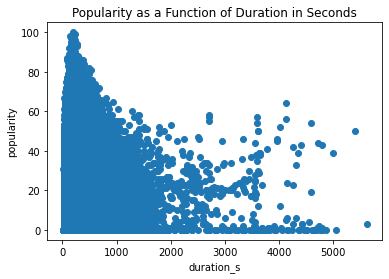

In [24]:
plt.scatter(
    x=df_no_na["duration_s"],
    y=df_no_na["popularity"]
)

plt.xlabel("duration_s")
plt.ylabel("popularity")
plt.title("Popularity as a Function of Duration in Seconds")